In [2]:
from sympy import *
from IPython.display import *
init_printing()
var('a:z')
var('A:Z');

In [3]:
V=exp(z)-1
Z=solve(V-v,z)[0]
Z

In [4]:
N=9
p=[]
f=series(exp(x*Z),v,0,N)
for i in range(N):
    p.append(factorial(i)*f.coeff(v,i))
p

In [5]:
N=9
q=[]
f=series(exp(y*V),z,0,N)
for i in range(N):
    q.append(factorial(i)*f.coeff(z,i))
q

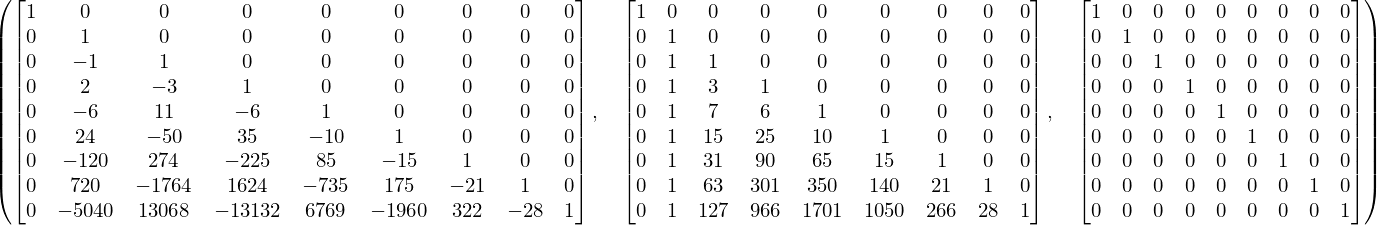

In [6]:
PCF=Matrix(N,N,lambda n,k: p[n].coeff(x,k))
QCF=Matrix(N,N,lambda n,k: q[n].coeff(y,k))
PCF,QCF,simplify(PCF*QCF)

In [7]:
qa=[]
for n in range(N):
    qa.append(bool(sum(p[n-k]*p[k].subs(x,y)*binomial(n,k) for k in range(n+1)).expand()-p[n].subs(x,x+y).expand()==0))
qa    

[True, True, True, True, True, True, True, True, True]

In [8]:
W=[]
WW=[]
for n in range(N):
    W.append(zeros(N,N))
    WW.append(zeros(N,N))
    for k in range(floor(N/2)):
        for l in range(floor(N/2)):
            W[n][k,l]=sum(binomial(n,j)*PCF[n-j,k]*PCF[j,l] for j in range(n+1))
            WW[n][k,l]=PCF[n,k+l]*binomial(k+l,l)
[(W[a]-WW[a]).is_zero for a in range(N)]

[True, True, True, True, True, True, True, True, True]

In [9]:
for i in range(N):
    display([p[i],q[i]])

In [10]:
yy=[]
for m in range(N):
    g=0
    for i in range(m+1):
       g=g+p[m].coeff(x,i)*q[i]
    yy.append(simplify(g))    

display(yy)
    
xx=[]    
for m in range(N):
    g=0
    for i in range(m+1):
       g=g+q[m].coeff(y,i)*p[i] 
    xx.append(simplify(g))
    
display(xx)    

In [11]:
from sympy.functions.combinatorial.numbers import stirling
display([simplify(prod(x-j for j in range(n))-p[n]) for n in range(1,N)])
[(sum(stirling(n,k)*y**k for k in range(0,n+1))-q[n]) for n in range(1,N)]

The P-polynomials are falling factorials:
    $$p_n(x)=x^{(n)}=x(x-1)\cdots(x-(n-1))=\sum_{k=0}^n s(n,k)x^k$$
where $s(n,k)$ are Stirling numbers of the first kind.

And
$$q_n(y)=\sum_{k=0}^n S(n,k)y^k=\mathcal{T}_n(y)$$
the $\textit{Touchard}$ polynomials, with $S(n,k)$ the Stirling numbers of the second kind.

In [12]:
T=q
T

In [13]:
%store T

Stored 'T' (list)
